+ https://experiencia21.tec.mx/courses/530360/pages/evaluacion
+ https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children
+ https://arxiv.org/abs/1806.01579, https://arxiv.org/pdf/1806.01579
+ https://github.com/uci-ml-repo/ucimlrepo
  
# Overview

The data set describes pediatric patients with several hematologic diseases: malignant disorders (i.a. acute lymphoblastic leukemia, acute myelogenous leukemia, chronic myelogenous leukemia, myelodysplastic syndrome) and nonmalignant cases (i.a. severe aplastic anemia, Fanconi anemia, with X-linked adrenoleukodystrophy). All patients were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation. 
 
The motivation of the study was to identify the most important factors influencing the success or failure of the transplantation procedure. In particular, the aim was to verify the hypothesis that increased dosage of CD34+ cells / kg extends overall survival time without simultaneous occurrence of undesirable events affecting patients' quality of life (KawÅ‚ak et al., 2010).

The data set has been used in our work concerning survival rules (WrÃ³bel et al., 2017) and user-guided rule induction (Sikora et al., 2019). The authors of the research on stem cell transplantation (KawÅ‚ak et al., 2010) who inspired our study also contributed to the set.

`Has Missing Values? Yes`

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bone_marrow_transplant_children = fetch_ucirepo(id=565) 
  
# data (as pandas dataframes) 
X = bone_marrow_transplant_children.data.features 
y = bone_marrow_transplant_children.data.targets 

In [3]:
%%capture

# metadata 
print(bone_marrow_transplant_children.metadata) 
  
# variable information 
print(bone_marrow_transplant_children.variables) 

In [4]:
len(list(X.columns)), len(list(y.columns))

(36, 1)

In [5]:
X.describe()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,186.000000,185.000000,186.000000,...,187.000000,156.000000,187.000000,182.000000,182.000000,185.000000,187.000000,187.000000,187.000000,187.000000
mean,0.598930,0.775401,33.472068,0.443850,0.598930,0.171123,0.390374,0.274194,0.854054,0.720430,...,0.786096,0.820513,11.891781,5.385096,4.745714,35.801081,26752.866310,90937.919786,775408.042781,938.743316
std,0.491431,0.418438,8.271826,0.498171,0.491431,0.377627,0.837632,0.938706,0.354010,0.449999,...,0.411161,0.384996,9.914386,9.598716,3.859128,19.650922,161747.200525,288242.407688,418425.252689,849.589495
min,0.000000,0.000000,18.646575,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.790000,0.204132,0.040000,6.000000,9.000000,9.000000,10.000000,6.000000
25%,0.000000,1.000000,27.039726,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,...,1.000000,1.000000,5.350000,1.786683,1.687500,19.000000,13.000000,16.000000,1000000.000000,168.500000
50%,1.000000,1.000000,33.550685,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,9.720000,2.734462,4.325000,33.000000,15.000000,21.000000,1000000.000000,676.000000
75%,1.000000,1.000000,40.117809,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,15.415000,5.823565,6.785000,50.600000,17.000000,37.000000,1000000.000000,1604.000000
max,1.000000,1.000000,55.553425,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,57.780000,99.560970,20.020000,103.400000,1000000.000000,1000000.000000,1000000.000000,3364.000000


In [6]:
categoric_cols = [
    'Recipientgender',
    'Stemcellsource',
    'Donorage35',
    'IIIV',
    'Gendermatch',
    'DonorABO',
    'RecipientABO',
    'RecipientRh',
    'ABOmatch',
    'CMVstatus',
    'DonorCMV',
    'RecipientCMV',
    'Disease',
    'Riskgroup',
    'Txpostrelapse',
    'Diseasegroup',
    'HLAmatch',
    'HLAmismatch',
    'Antigen',
    # 'Alel',
    'HLAgrI',
    'Recipientage10',
    'Recipientageint',
    'Relapse',
    'aGvHDIIIIV',
    'extcGvHD'
]

numeric_cols = [
    'Donorage',
    'Recipientage',
    'CD34kgx10d6',
    'CD3dCD34',
    'CD3dkgx10d8',
    'Rbodymass',
    'ANCrecovery',
    'PLTrecovery',
    'time_to_aGvHD_III_IV',
    'survival_time',
    # 'survival_status'
]

In [7]:
X[categoric_cols].astype('category').describe()

,Recipientgender,Stemcellsource,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,CMVstatus,...,Diseasegroup,HLAmatch,HLAmismatch,Antigen,HLAgrI,Recipientage10,Recipientageint,Relapse,aGvHDIIIIV,extcGvHD
count,187,187,187,187,187,187,186.0,185.0,186.0,171.0,...,187,187,187,186.0,187,187,187,187,187,156.0
unique,2,2,2,2,2,4,4.0,2.0,2.0,4.0,...,2,4,2,4.0,7,2,3,2,2,2.0
top,1,1,0,1,0,0,1.0,1.0,1.0,2.0,...,1,0,0,-1.0,0,0,2,0,1,1.0
freq,112,145,104,112,155,73,75.0,158.0,134.0,57.0,...,155,94,159,93.0,94,99,89,159,147,128.0


In [8]:
X.astype('category').describe()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time
count,187,187,187.000000,187,187,187,187,186.0,185.0,186.0,...,187,156.0,187.00,182.000000,182.00,185.0,187,187,187,187
unique,2,2,187.000000,2,2,2,4,4.0,2.0,2.0,...,2,2.0,183.00,182.000000,163.00,130.0,18,50,28,174
top,1,1,18.646575,0,1,0,0,1.0,1.0,1.0,...,1,1.0,3.53,0.204132,0.13,23.0,15,1000000,1000000,41
freq,112,145,1.000000,104,112,155,73,75.0,158.0,134.0,...,147,128.0,2.00,1.000000,3.00,5.0,24,17,145,3


# Correlacion

In [9]:
# cor = X[numeric_cols].corr()
cor = X[numeric_cols].corr()

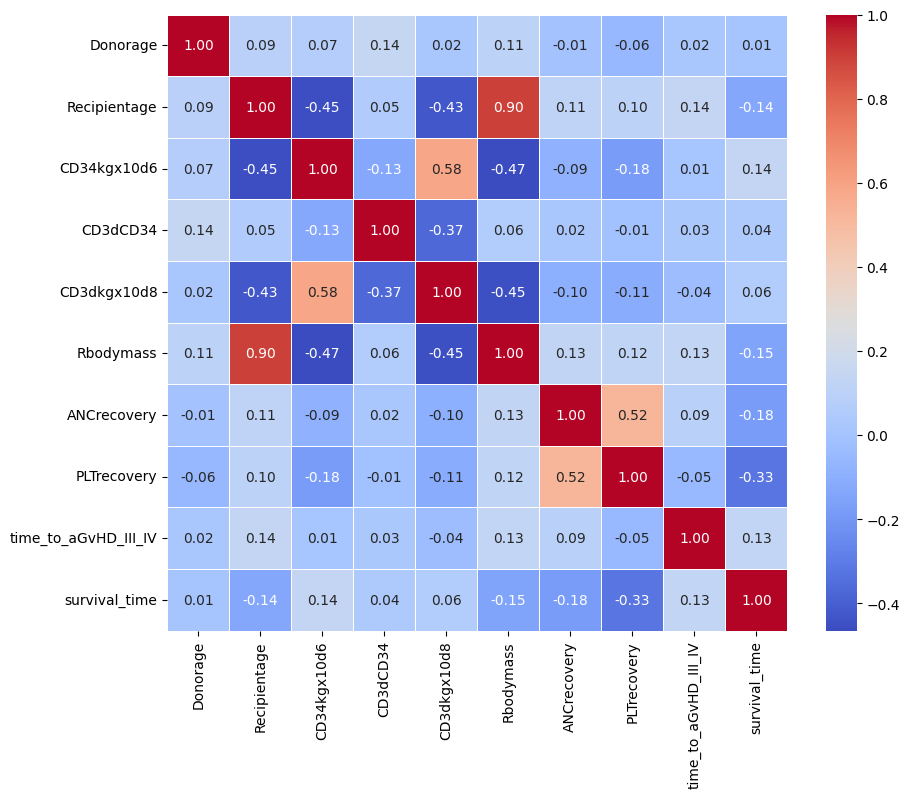

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Paso 4: Mostrar el gráfico
plt.show()

<Axes: >

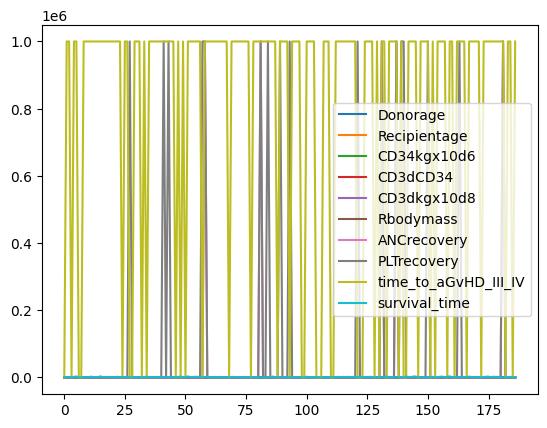

In [11]:
X[numeric_cols].plot()

# Histograma

array([[<Axes: title={'center': 'Donorage'}>,
        <Axes: title={'center': 'Recipientage'}>,
        <Axes: title={'center': 'CD34kgx10d6'}>],
       [<Axes: title={'center': 'CD3dCD34'}>,
        <Axes: title={'center': 'CD3dkgx10d8'}>,
        <Axes: title={'center': 'Rbodymass'}>],
       [<Axes: title={'center': 'ANCrecovery'}>,
        <Axes: title={'center': 'PLTrecovery'}>,
        <Axes: title={'center': 'time_to_aGvHD_III_IV'}>],
       [<Axes: title={'center': 'survival_time'}>, <Axes: >, <Axes: >]],
      dtype=object)

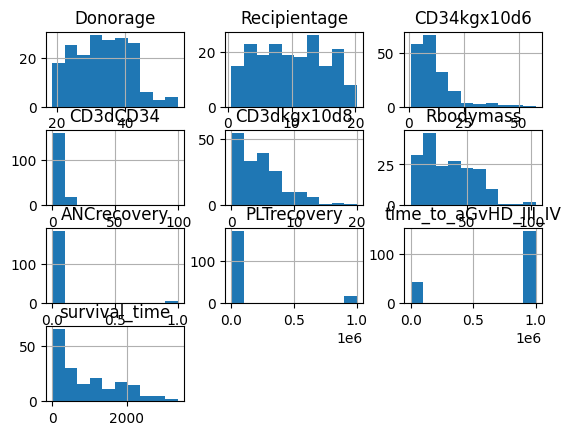

In [12]:
X[numeric_cols].hist()

# Missing values

In [13]:
# X.isna().sum()
X.isna().sum() * 100 / len(X) # pct

Recipientgender          0.000000
Stemcellsource           0.000000
Donorage                 0.000000
Donorage35               0.000000
IIIV                     0.000000
Gendermatch              0.000000
DonorABO                 0.000000
RecipientABO             0.534759
RecipientRh              1.069519
ABOmatch                 0.534759
CMVstatus                8.556150
DonorCMV                 1.069519
RecipientCMV             7.486631
Disease                  0.000000
Riskgroup                0.000000
Txpostrelapse            0.000000
Diseasegroup             0.000000
HLAmatch                 0.000000
HLAmismatch              0.000000
Antigen                  0.534759
Allele                   0.534759
HLAgrI                   0.000000
Recipientage             0.000000
Recipientage10           0.000000
Recipientageint          0.000000
Relapse                  0.000000
aGvHDIIIIV               0.000000
extcGvHD                16.577540
CD34kgx10d6              0.000000
CD3dCD34      

In [14]:
df = pd.concat([X,y], axis=1)

In [15]:
df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,1.0,7.20,1.338760,5.38,35.0,19,51,32,999,0
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,1.0,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,1.0,7.94,19.013230,0.42,23.4,23,20,1000000,435,1
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,NaN,4.25,29.481647,0.14,50.0,23,29,19,53,1
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,1.0,51.85,3.972255,13.05,9.0,14,14,1000000,2043,0


In [17]:
pd.crosstab(df['Recipientgender'], df['Stemcellsource'])

Stemcellsource,0,1
Recipientgender,,
0,18,57
1,24,88


In [21]:
pd.crosstab(df[categoric_cols[0]],df[categoric_cols[1]])

Stemcellsource,0,1
Recipientgender,,
0,18,57
1,24,88


In [ ]:
# sns.pairplot(X[numeric_cols])
# plt.show()

In [ ]:
# sns.pairplot(df)
# plt.show()

# Save to CSV

In [ ]:
# df.to_csv('../data/raw/bone-marrow.csv', index=False, header=True)